In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
data = pd.read_csv("Aluminium_stress_data.csv")

In [3]:
label_encoder = LabelEncoder()
data['material_encoded'] = label_encoder.fit_transform(data['material'])

In [5]:
X = data[['material_encoded', 'Exy', 'PRxy', 'thickness', 'FOS', 'Permissible stress']]
y = data['max stress']


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [10]:
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=5)
rf_grid.fit(X_train, y_train)
rf_model = rf_grid.best_estimator_


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings

In [11]:
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42)

In [12]:
def evaluate(model, name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n{name} Evaluation:")
    print(f"  Mean Squared Error: {mse:.2f}")
    print(f"  R² Score: {r2:.4f}")
    return y_pred

In [13]:
y_pred_rf = evaluate(rf_model, "Random Forest")
y_pred_gb = evaluate(gb_model, "Gradient Boosting")


Random Forest Evaluation:
  Mean Squared Error: 543320366666666.69
  R² Score: 0.8917

Gradient Boosting Evaluation:
  Mean Squared Error: 270333331651559.72
  R² Score: 0.9461


Text(0.5, 1.0, 'Random Forest')

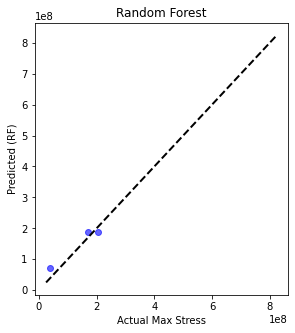

In [14]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Max Stress")
plt.ylabel("Predicted (RF)")
plt.title("Random Forest")


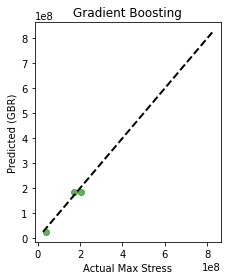

In [15]:
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_gb, color='green', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Max Stress")
plt.ylabel("Predicted (GBR)")
plt.title("Gradient Boosting")

plt.tight_layout()
plt.show()

In [39]:
example_material = 'Al 6061-T6'  # Must exist in your dataset
material_code = label_encoder.transform([example_material])[0]

new_input = pd.DataFrame({
    'material_encoded': [material_code],
    'Exy': [6.9E+09],
    'PRxy': [0.33],
    'thickness': [0.04],
    'FOS': [2],
    'Permissible stress': [183.5]
})


In [40]:
new_input_scaled = scaler.transform(new_input)

predicted_max_stress = rf_model.predict(new_input_scaled)[0]
print(f"\nPredicted Max Stress (RF) for '{example_material}': {predicted_max_stress:.4E} MPa")


Predicted Max Stress (RF) for 'Al 6061-T6': 1.3494E+08 MPa
